In [1]:
from PIL import Image
import cv2
import numpy as np
import pytesseract

In [2]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
def noise_removal(image):
    kernel = np.ones((1,1), np.uint8)
    image = cv2.dilate(image , kernel, iterations=1)
    kernel = np.ones((1,1), np.uint8)
    image = cv2.erode(image,kernel,iterations=1)
    image = cv2.morphologyEx(image , cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image , 3)
    return (image)

In [4]:
def remove_borders(image):
    contours, heirarchy = cv2.findContours(image , cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_SIMPLE)
    cntSorted = sorted(contours, key=lambda x:cv2.contourArea(x))
    cnt = cntSorted[-1]

    x,y,w,h = cv2.boundingRect(cnt)
    crop = image[y:y+h,x:x+w]
    return crop

In [5]:
def thin_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.erode(image , kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

In [6]:
def thick_font(image):
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2), np.uint8)
    image = cv2.dilate(image , kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return image

In [7]:
color = [255,255,255]
top , bottom , left , right = [150]*4


In [8]:
def preprocess_image(im_file):
    img = cv2.imread(im_file)
    gray_image= grayscale(img)
    thresh , im_bw = cv2.threshold(gray_image , 210 , 230, cv2.THRESH_BINARY)
    no_noise = noise_removal(im_bw)
    # thin = thin_font(no_noise)
    # no_borders = remove_borders(no_noise)
    # image_with_border = cv2.copyMakeBorder(no_borders, top, bottom , left , right, cv2.BORDER_CONSTANT , value=color)
    return no_noise



In [9]:
#displaying-different-images-with-actual-size-in-matplotlib-subplot
from matplotlib import pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()
    

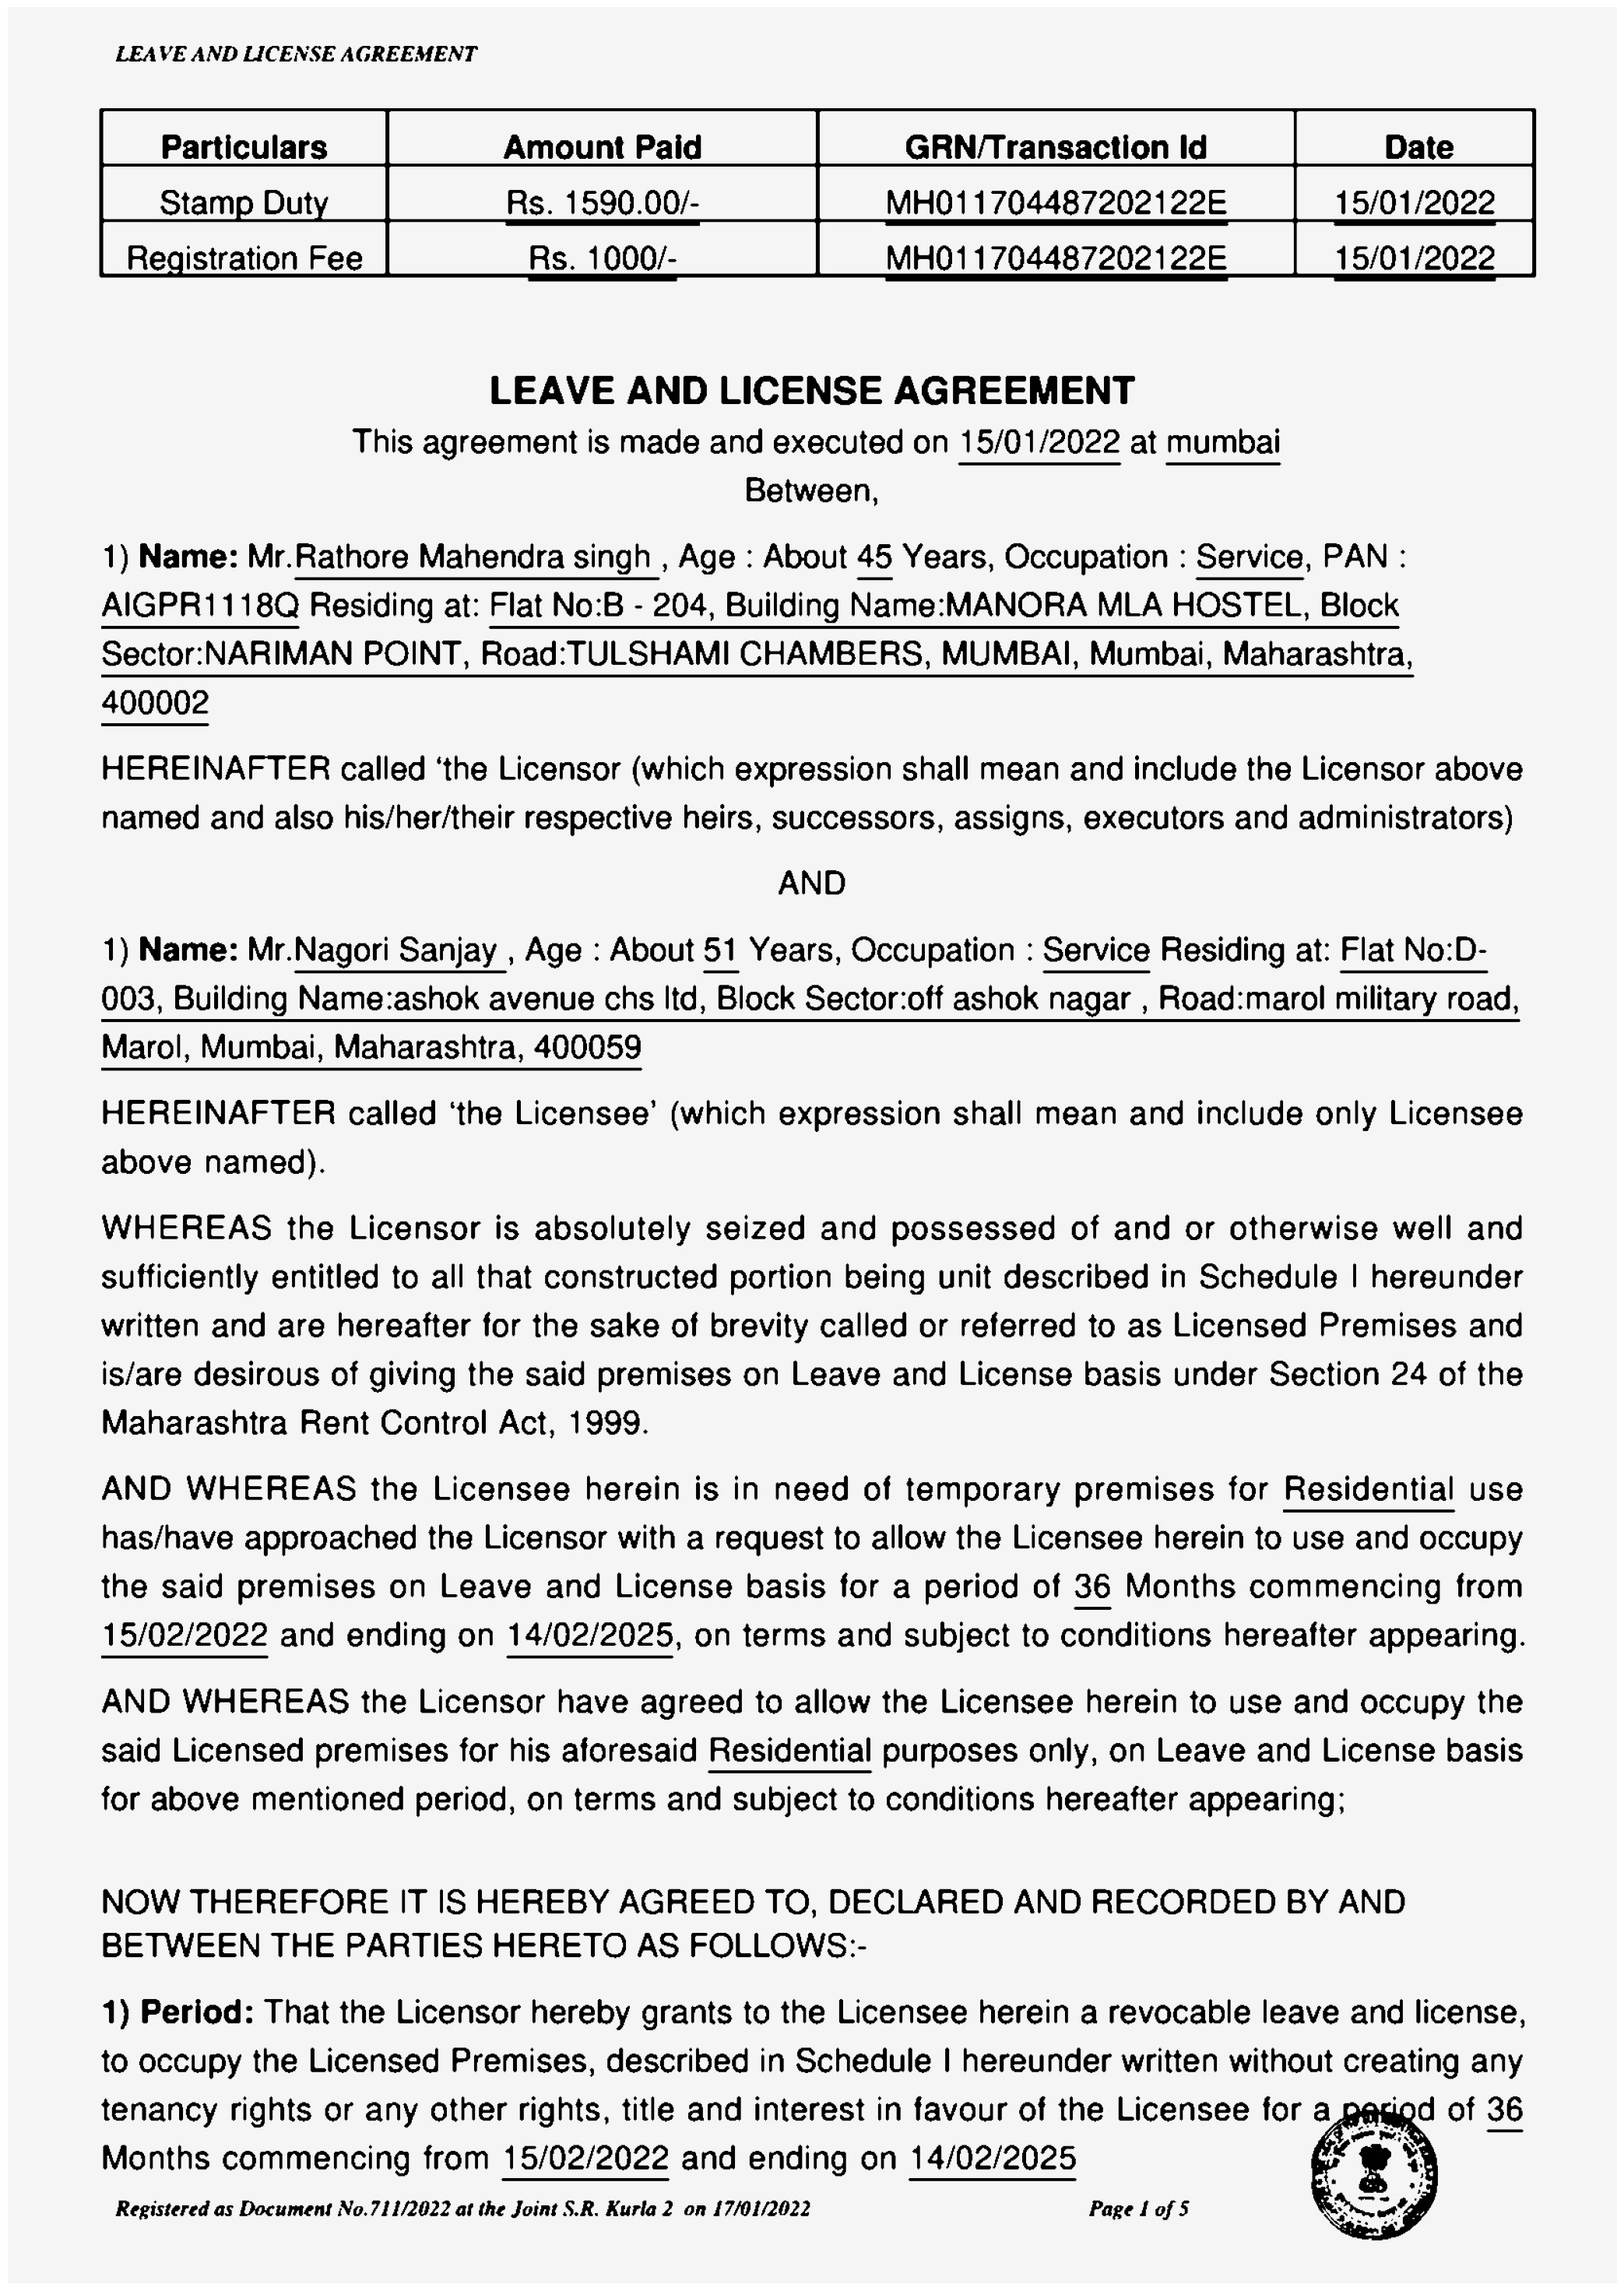

In [19]:
final_image = preprocess_image("Agreement AshokAvenue C 001-06.png")
cv2.imwrite("temp/final_test.jpg", final_image)
display("temp/final_test.jpg")

In [20]:
img = Image.open("temp/final_test.jpg")
ocr_result = pytesseract.image_to_string(img)
print(ocr_result)

LEAVE AND LICENSE AGREEMENT

Particulars Amount Paid GRN/Transaction Id
Rs. 1590.00/- MH011704487202122E 15/01/2022
Registration Fee Rs. 1000/- MHO011704487202122E 15/01/2022

LEAVE AND LICENSE AGREEMENT
This agreement is made and executed on 15/01/2022 at mumbai
Between,

1) Name: Mr.Rathore Mahendra singh , Age : About 45 Years, Occupation : Service, PAN :
AIGPR1118Q Residing at: Flat No:B - 204, Building Name: MANORA MLA HOSTEL, Block
Sector:NARIMAN POINT, Road: TULSHAMI CHAMBERS, MUMBAI, Mumbai, Maharashtra,
400002

HEREINAFTER called ‘the Licensor (which expression shall mean and include the Licensor above
named and also his/her/their respective heirs, successors, assigns, executors and administrators)

AND

1) Name: Mr.Nagori Sanjay , Age : About 51 Years, Occupation : Service Residing at: Flat No:D-
003, Building Name:ashok avenue chs ltd, Block Sector:off ashok nagar , Road:marol military road,
Marol, Mumbai, Maharashtra, 400059

HEREINAFTER called ‘the Licensee’ (which express

In [17]:
img = Image.open("test2.png")
ocr_result = pytesseract.image_to_string(img)
print(ocr_result)

TOO

Body armor

Tlingit warviors protected thet torso and extremities
with hide and wooden armor, worn separately or to
tether. Tlingit terme for hide armor incude:gek, “pro-
tector” [term not confirmed in modern orthography
Ie (long hide armor) san yinaadt (hide armor); and
ulin without asm” (hide armor vest). Other terms
reference armor of wood: niyaahdat or yinaahdat,‘pro-
tecting thing” (possibly referring to a breastplate); ghw
{dat armor, from very strong wood); gust, “lap cover”
‘or sankeit, “waist cover” (possibly slat armor); wandaa,
bout the edge" or arface ofthe edge” (rod armor?) and
Fake “foot shel” (leg armor)

‘kin armor is nearly universal among North Ameri
can Natives, and the Tlingit had access to some ofthe
thickest hides walrs, se on, and moose ~that were
falded and pleced to create loose fitting armor of two
or more leyers. The skine were prepared in sucha way
thatthe finished prodsct could be up to half an inch in
thickness and so hard and if tht it may have requ